# Rolling disk on a spheric surface

<img src="rolling_disk.png" alt="Drawing" style="width: 400px;"/>

In [42]:
from scipy.integrate import quad, ode
import scipy.special as special
import numpy as np
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [43]:
# Sphere radii
R = 1
r = 0.1

# Angular speeds
omega_r = 1
omega_s = 0

# Coordinates
t = symbols("t")
x, y, z = symbols("x y z")
gamma_1, gamma_2, gamma_3 = symbols("gamma_1 gamma_2 gamma_3")
# omega_r, omega_s = symbols("omega_r omega_s")

normal_vec = Matrix([x/R, y/R, z/R])
N_matrix = normal_vec.jacobian([x, y, z])

In [44]:
def skew_matrix(vec):
    return np.array([[0, -vec[2], vec[1]], 
                     [vec[2], 0, -vec[0]], 
                     [-vec[1], vec[0], 0]])

In [45]:
# Orientation vector
gamma = Matrix([[gamma_1], [gamma_2], [gamma_3]])
gNg = gamma.T*N_matrix*gamma

# Position and orientation vectors
pos_p = r*omega_r*gamma
orient_p = omega_s*skew_matrix(normal_vec)*gamma - r*omega_r*gNg.det()*normal_vec
orient_p = orient_p.subs(gamma_1**2, 1-gamma_2**2-gamma_3**2)

states_p = Matrix([pos_p, orient_p])
states = Matrix([x, y, z, gamma_1, gamma_2, gamma_3])

df_func = []
for i in range(len(states_p)):
    df_func.append(lambdify(states, states_p[i]))


In [46]:
def df(t, y):
    dval = []
    for i in range(len(y)):
        dval.append(df_func[i](*y))
    
    return dval

In [47]:
def int_ode(y0, time):
    sol=[]
    sol.append(y0)
    
    r = ode(df)
    r.set_integrator('vode', method='bdf')
    r.set_initial_value(y0,time[0])
    
    for t in time[1:]:
        r.integrate(t)
        sol.append(r.y)
    
    return sol

In [48]:
t_f

62.83185307179586

In [49]:
n_rR = R/r

# Final time
t_f = float(n_rR*2*pi/omega_r)
dt = 1e-3

time = np.linspace(0, t_f, floor(t_f/dt))
y0 = np.array([0, 0, 0, 0, 0, 1])

sol = np.array(int_ode(y0, time))

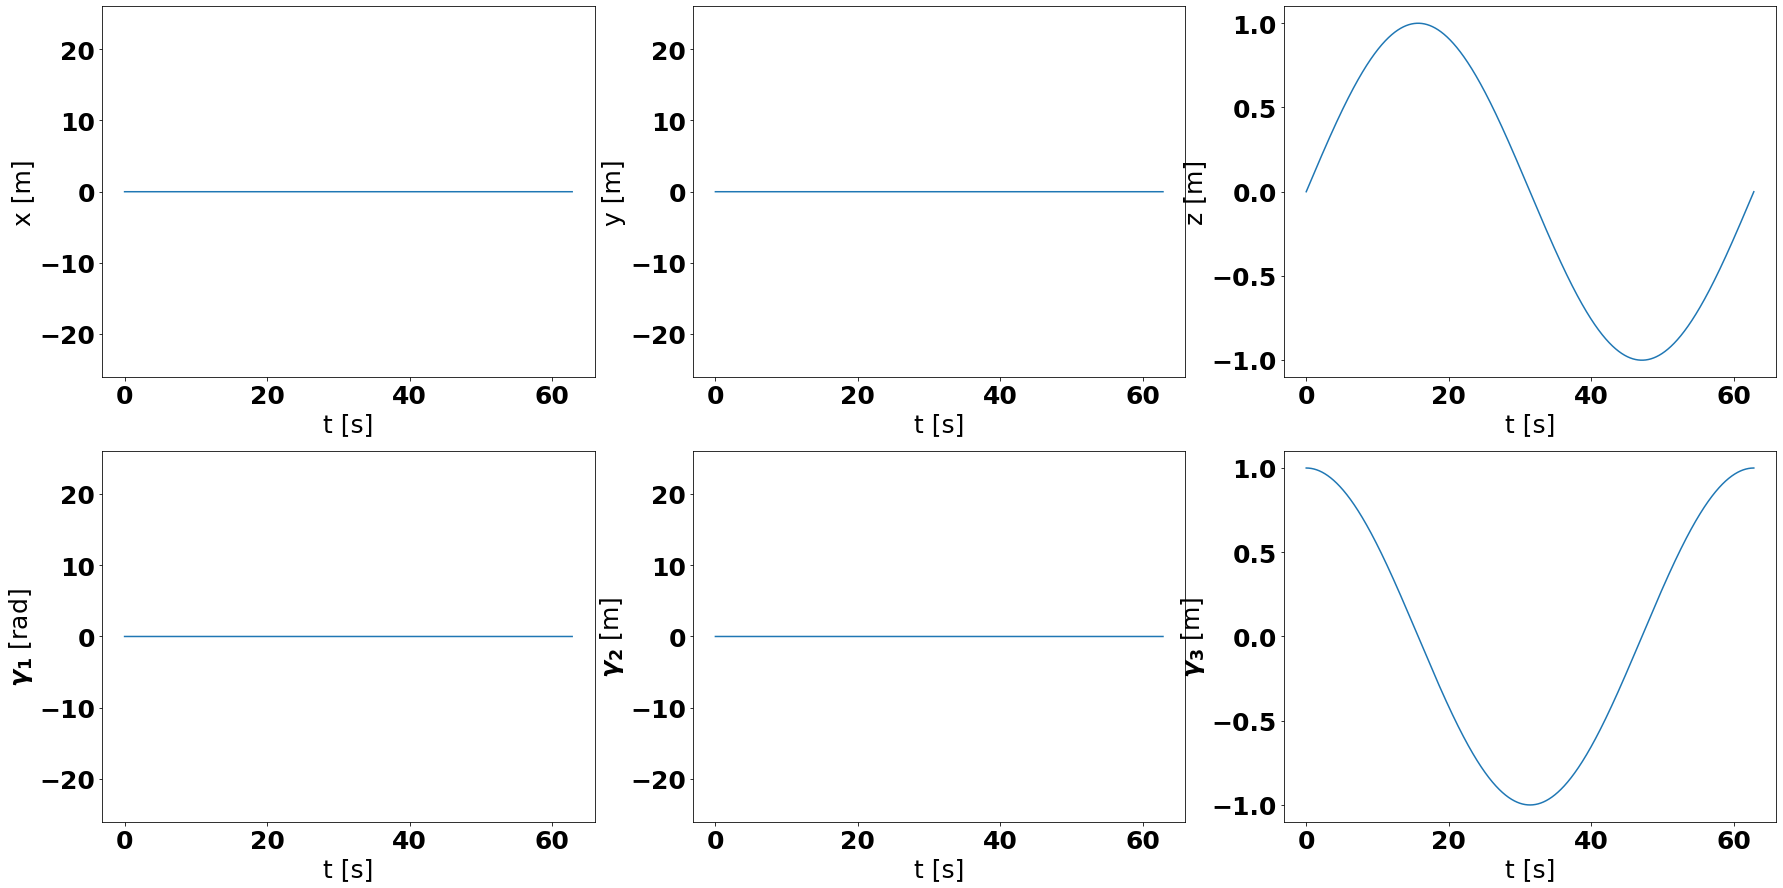

In [50]:
fig = plt.figure(figsize=(30, 15))

# notice that nrows = number of images
axs = plt.subplot(2, 3, 1)
plt.plot(time, sol[:, 0])

plt.xlabel('t [s]')
plt.ylabel('x [m]')

axs.axis('equal')
axs.ylim=[0, max(sol[:, 0])]

# ncols stays as 1 
axs = plt.subplot(2, 3, 2)
plt.plot(time, sol[:, 1])
plt.xlabel('t [s]')
plt.ylabel('y [m]')

axs.axis('equal')
axs.ylim=[0, max(sol[:, 1])]

# each image has a unique index
axs = plt.subplot(2, 3, 3)
plt.plot(time, sol[:, 2])
plt.xlabel('t [s]')
plt.ylabel('z [m]')

axs = plt.subplot(2, 3, 4)
plt.plot(time, sol[:, 3])
plt.xlabel('t [s]')
plt.ylabel('$\gamma_1$ [rad]')

axs.axis('equal')
axs.ylim=[0, max(sol[:, 3])]

# ncols stays as 1 
axs = plt.subplot(2, 3, 5)
plt.plot(time, sol[:, 4])
plt.xlabel('t [s]')
plt.ylabel('$\gamma_2$ [m]')

axs.axis('equal')
axs.ylim=[0, max(sol[:, 4])]

# each image has a unique index
axs = plt.subplot(2, 3, 6)
plt.plot(time, sol[:, 5])
plt.xlabel('t [s]')
plt.ylabel('$\gamma_3$ [m]')


plt.show()

In [40]:
r

0.1